# Final Project

For your final project you will develop a data narrative with a dataset of your choosing. Your data can come from any source. You do not have to comprehensively explore your data. Pick an interesting aspect or two from which to build your narrative.

**Due date: 06-December-2024**

## Requirements

- At least **three** visualizations. Visualizations can be simple bar charts that total data categories or rich exploratory figures. (*Tables also count as visualizations but you must have at least two charts.*) 
- All of the code should be recorded in your narrative. That is, I should be able to run your notebook code start to finish re-producing each of your outputs without error.
- At least **two** but no more than **three** paragraphs walking the reader through your analysis.
- Charts should exhibit your command of `ggplot2/dplyr/forcats/tidyr` with: 
  - sensibly sorted categories, 
  - interpretable labels/axis titles, 
  - useful annotations (when applicable), 
  - adjustments to default chart aesthetics, 
  - appropriate markings (e.g. `geoms`) and encodings.

## Notes

*This project should not take you longer than the time to complete two of our assignments. It is meant to demonstrate that you can build an analysis using `R` and the `Tidyverse` from scratch. Focus your analysis on a small number of data features that you find interesting.*

*Remember all the ways of visualizing distributions (ECDFs, histograms, jitter-ed scatter plots, etc.). These will come in very handy!* 

## Analysis and Visualization of Differential Gene Expression in Breast Cancer Cells Treated with Adipocyte-Conditioned Media

**Please download "GSE282461_BT549_ACMvUCM_foldchange.txt.gz" brefore running the code.

In this analysis, we investigated differential gene expression data from breast cancer cells treated with adipocyte-conditioned media (ACM) versus unconditioned media (UCM) from the research article https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE282461. The dataset was preprocessed to focus on genes with significant adjusted p-values (padj<0.05) and categorized based on log2 fold changes: "High Upregulation" (>2), "Moderate Upregulation" (1 to 2), "High Downregulation" (<=2), "Moderate Downregulation" (−1 to −2), and "No Significant Change(-1 to 1)." This categorization enabled us to visualize trends and highlight genes with strong biological relevance. The resulting data frame was saved and reloaded for consistency and reproducibility.

To explore the most impactful genes, we identified the top 10 differentially expressed genes by absolute log2 fold change. These genes were visualized in a bar chart, where "High Upregulation" genes stood out with significant positive log2 fold changes, and "High Downregulation" genes exhibited substantial negative changes. This visualization provided an intuitive representation of the strongest responders to ACM treatment, revealing key candidates for further study.

A volcano plot was created to assess the overall distribution of gene expression changes. Genes were plotted by log2 fold change against 
−log10(padj), with color coding for their regulation category. Vertical dashed lines marked fold change thresholds, and a horizontal line highlighted the significance threshold (padj=0.05. High upregulation genes that were distant from the majority were labeled with their names for easier identification. These genes represent potential biomarkers or therapeutic targets, as their pronounced expression changes could be critical in understanding the effects of ACM on breast cancer cells.

In [8]:
library('tidyverse')
library('readr')


df = read_delim("GSE282461_BT549_ACMvUCM_foldchange.txt", delim = " ")
df |> head()

write_csv(df, "GSE282461_BT549_ACMvUCM_foldchange.csv")
df_csv = read_csv("GSE282461_BT549_ACMvUCM_foldchange.csv")

Rows: 15538 Columns: 8
── Column specification ────────────────────────────────────────────────────────
Delimiter: " "
chr (2): gene_ID, gene_name
dbl (6): baseMean, log2FoldChange, lfcSE, stat, pvalue, padj

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


gene_ID,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,gene_name
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
ENSG00000000003.16,310.0489,0.2539393,0.1821496,1.3941252,0.16327979,0.4906617,TSPAN6
ENSG00000000419.14,1318.6170,-0.1080022,0.1097323,-0.9842334,0.32500078,0.6703066,DPM1
ENSG00000000457.14,123.8387,0.0437884,0.2368588,0.1848713,0.85332998,0.9593814,SCYL3
ENSG00000000460.17,523.3999,-0.2851068,0.1603257,-1.7782981,0.07535491,0.3343585,FIRRM
ENSG00000000971.17,137.8447,-1.7119041,1.1666016,-1.4674282,0.14225960,0.4604648,CFH
ENSG00000001036.14,3112.6351,0.1253492,0.1095355,1.1443704,0.25247004,0.5992533,FUCA2


In [11]:
df_csv |> head()

gene_ID,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,gene_name
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
ENSG00000000003.16,310.0489,0.2539393,0.1821496,1.3941252,0.16327979,0.4906617,TSPAN6
ENSG00000000419.14,1318.6170,-0.1080022,0.1097323,-0.9842334,0.32500078,0.6703066,DPM1
ENSG00000000457.14,123.8387,0.0437884,0.2368588,0.1848713,0.85332998,0.9593814,SCYL3
ENSG00000000460.17,523.3999,-0.2851068,0.1603257,-1.7782981,0.07535491,0.3343585,FIRRM
ENSG00000000971.17,137.8447,-1.7119041,1.1666016,-1.4674282,0.14225960,0.4604648,CFH
ENSG00000001036.14,3112.6351,0.1253492,0.1095355,1.1443704,0.25247004,0.5992533,FUCA2


In [20]:
df_regulation = df_csv |> filter(padj < 0.05) |>
mutate(fold_change_category = case_when(
    log2FoldChange > 2 ~ "High Upregulation",
    log2FoldChange > 1 ~ "Moderate Upregulation",
    log2FoldChange < -2 ~ "High Downregulation",
    log2FoldChange < -1 ~ "Moderate Downregulation",
    TRUE ~ "No Significant Change"
  ))

Warning message:
“No shared levels found between `names(values)` of the manual scale and the
data's fill values.”
Warning message:
“No shared levels found between `names(values)` of the manual scale and the
data's fill values.”


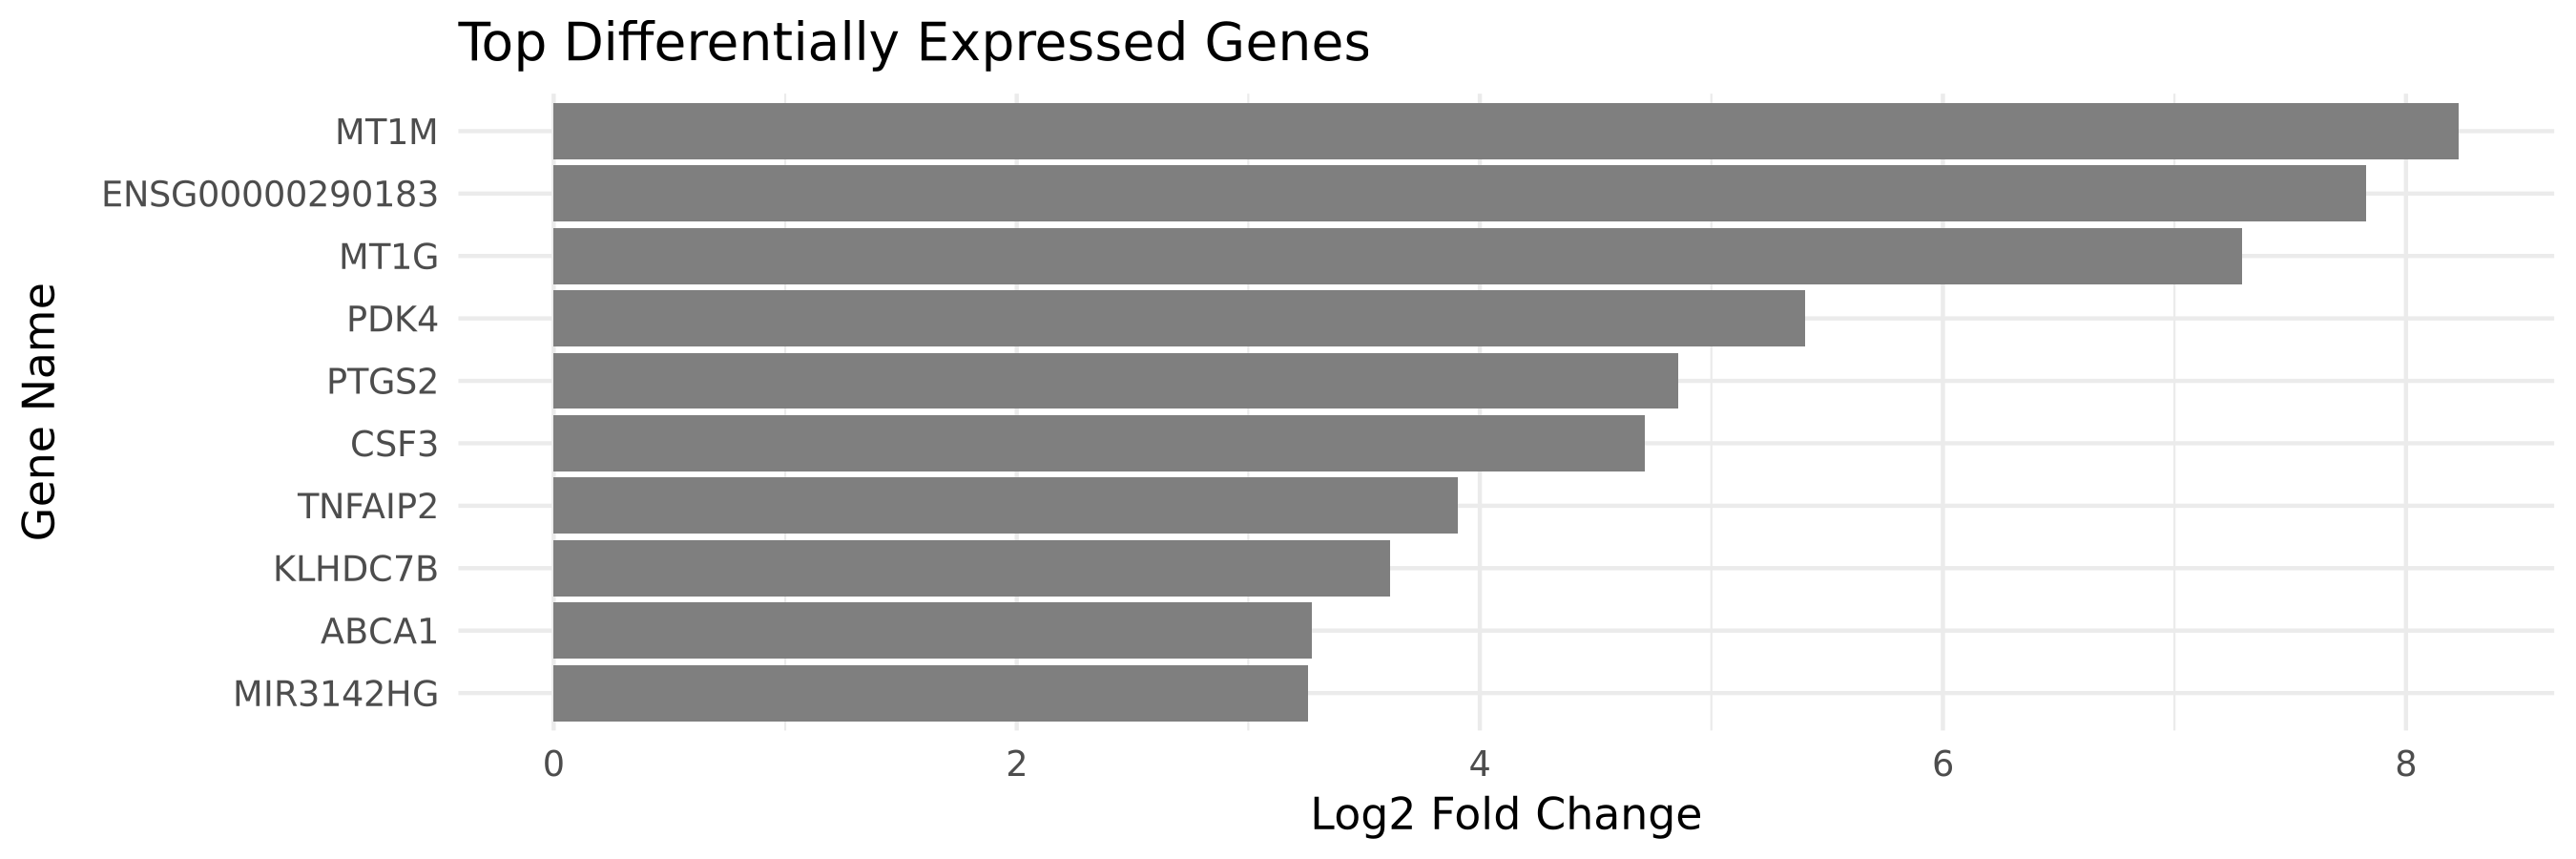

In [43]:
top_genes = df_regulation |>
  arrange(desc(abs(log2FoldChange))) |>
  slice(1:10)

ggplot(top_genes, aes(x = reorder(gene_name, log2FoldChange), y = log2FoldChange, fill = fold_change_category)) +
  geom_col() +
  coord_flip() +
  scale_fill_manual(values = c("Upregulated" = "red", "Downregulated" = "blue")) +
  labs(title = "Top Differentially Expressed Genes", x = "Gene Name", y = "Log2 Fold Change") +
  theme_minimal()

In [39]:
library('ggrepel')

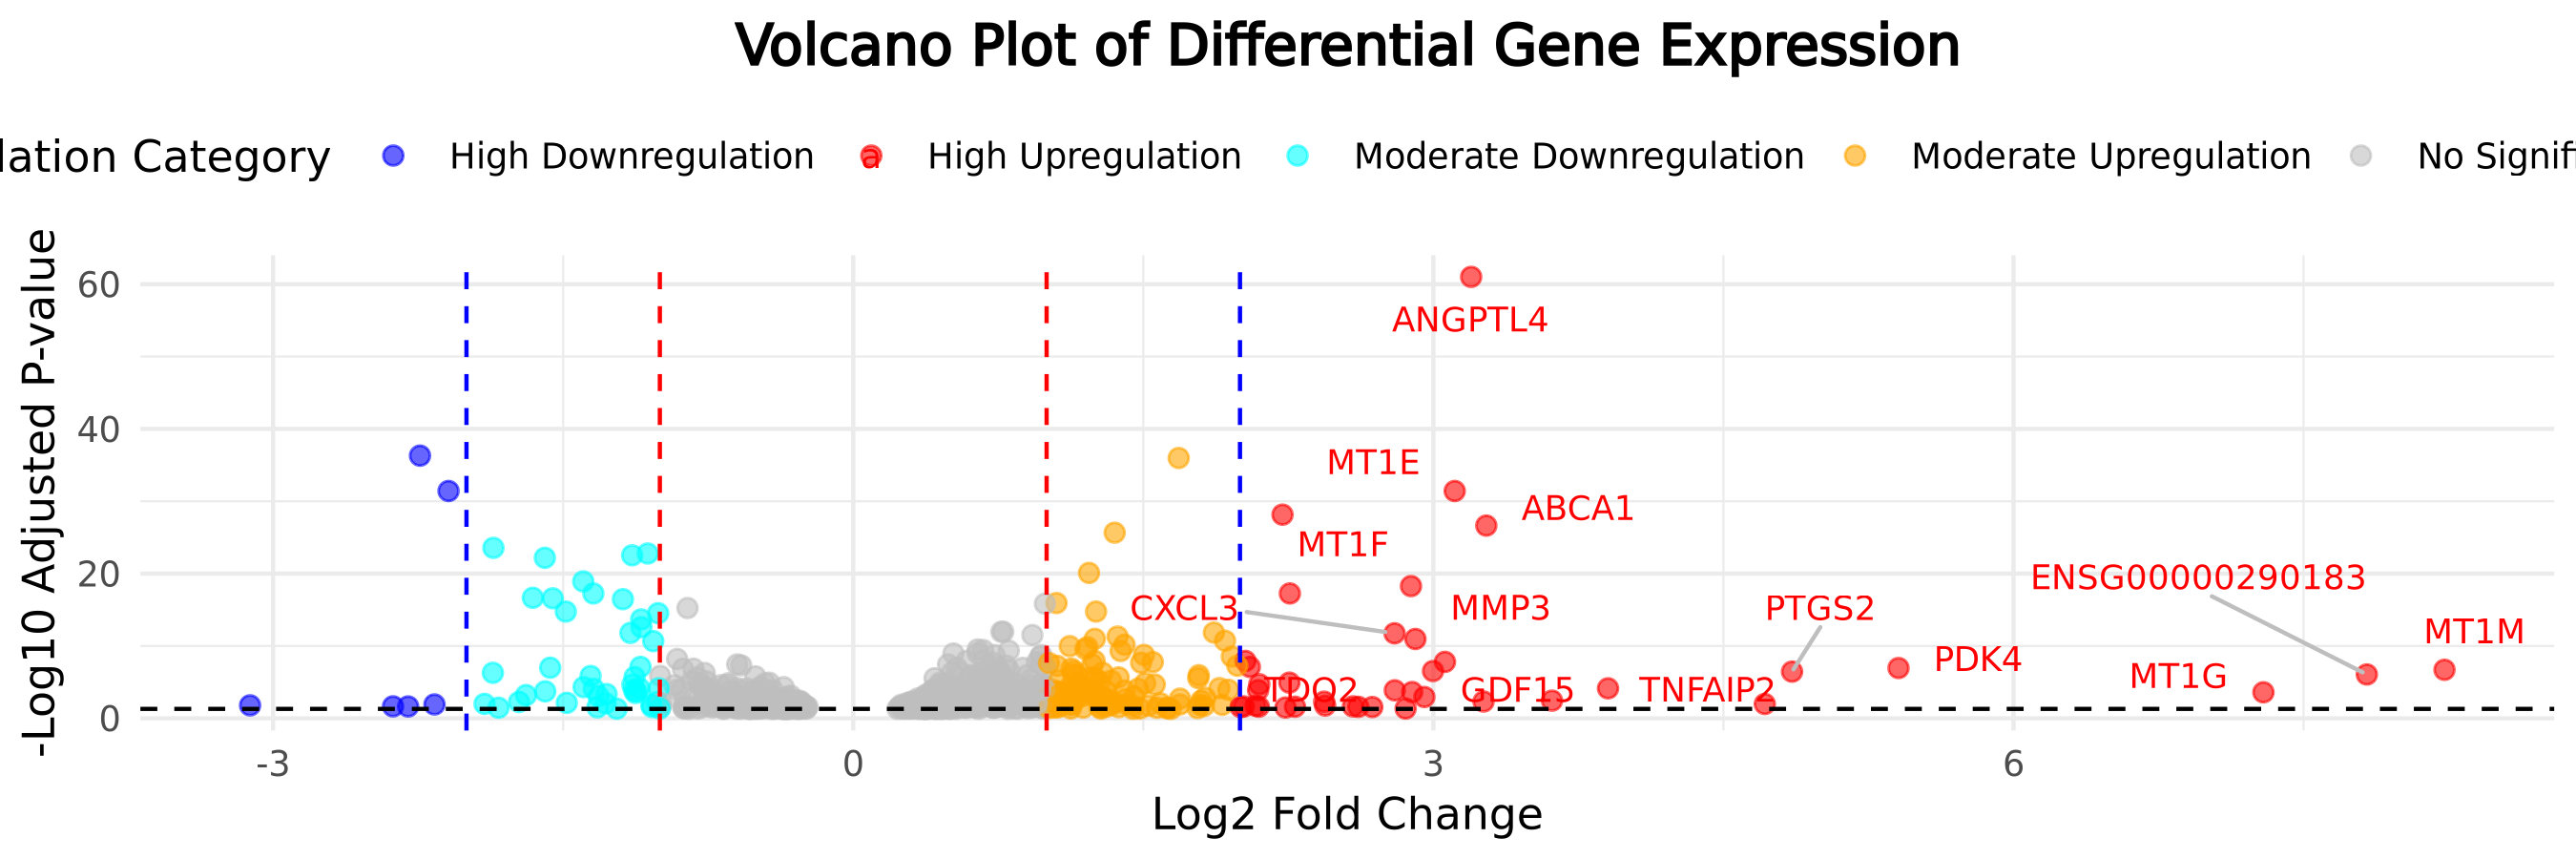

In [40]:
labeled_genes = df_regulation |>
  filter(fold_change_category == "High Upregulation", log2FoldChange > 2.5, -log10(padj) > 3)

ggplot(df_regulation, aes(x = log2FoldChange, y = -log10(padj), color = fold_change_category)) +
  geom_point(alpha = 0.6, size = 2) +
  geom_vline(xintercept = c(-1, 1), linetype = "dashed", color = "red") +
  geom_vline(xintercept = c(-2, 2), linetype = "dashed", color = "blue") +
  geom_hline(yintercept = -log10(0.05), linetype = "dashed", color = "black") +
  geom_text_repel(
    data = labeled_genes,
    aes(label = gene_name),
    size = 3, 
    box.padding = 0.5, 
    point.padding = 0.2, 
    segment.color = "gray", 
    segment.size = 0.5
  ) +
  scale_color_manual(values = c(
    "High Upregulation" = "red",
    "Moderate Upregulation" = "orange",
    "High Downregulation" = "blue",
    "Moderate Downregulation" = "cyan",
    "No Significant Change" = "gray"
  )) +
  labs(
    title = "Volcano Plot of Differential Gene Expression",
    x = "Log2 Fold Change",
    y = "-Log10 Adjusted P-value",
    color = "Regulation Category"
  ) +
  theme_minimal() +
  theme(
    legend.position = "top",
    plot.title = element_text(hjust = 0.5, size = 14, face = "bold")
  )